In [56]:
import pandas as pd
import matplotlib as plt
df_masked_driver_mapping=pd.read_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\masked_driver_order_mapping.parquet")
df_masked_driver_mapping
df_masked_driver_mapping.sort_values('driver_id')
#group the datdfram by Driver ID and have count in the ther collums

df_driver_grouped=df_masked_driver_mapping.groupby('driver_id').count().sort_values('web_order_id',ascending=False)

# pot how manny drivers by web order ID
df_driver_grouped
#rename the collum to experince
df_drievr_experince=df_driver_grouped.rename(columns={'web_order_id':'experience'},inplace=False)
df_drievr_experince



,experience
driver_id,
2096,1432
886,1415
1131,1334
1376,1331
1931,1276
...,...
9145,1
8942,1
9546,1


In [57]:
driver_id_2_orders = df_masked_driver_mapping[df_masked_driver_mapping['driver_id'] == 2].shape[0]
print(f"Driver with ID 2 had {driver_id_2_orders} orders.")

Driver with ID 2 had 363 orders.


In [58]:
import matplotlib.pyplot as plt

df_driver_grouped['Orders_Grouped'] = df_driver_grouped['web_order_id'].apply(lambda x: '1000+' if x > 1000 else ('200-1000' if x > 200 else ('50-200' if x > 50 else ('10-50' if x > 10 else '<10'))))
display(df_driver_grouped)
df_driver_experience=df_driver_grouped.groupby('Orders_Grouped').count()
display(df_driver_experience)
# plot the results




,web_order_id,Orders_Grouped
driver_id,,
2096,1432,1000+
886,1415,1000+
1131,1334,1000+
1376,1331,1000+
1931,1276,1000+
...,...,...
9145,1,<10
8942,1,<10
9546,1,<10


,web_order_id
Orders_Grouped,
10-50,2639
1000+,38
200-1000,2149
50-200,5377
<10,739


In [59]:
df_masked_order_articles=pd.read_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\masked_order_articles.parquet")
df_masked_order_articles.sort_values('web_order_id').head(30)

,warehouse_id,box_id,article_id,article_weight_in_g,web_order_id
9167961,27,24020218.0,9922,333,1
9167962,27,24020219.0,19488,201,1
9167972,27,24020219.0,21396,457,1
9167963,27,24020219.0,22954,414,1
9167964,27,24020219.0,22312,310,1
9167974,27,24020219.0,21397,458,1
1732419,27,NaN,1302,14800,1
9167966,27,24020219.0,9084,83,1
9167967,27,24020219.0,9084,83,1
9167968,27,24020219.0,19488,201,1


In [60]:
df_articles_grouped = df_masked_order_articles.groupby('web_order_id').agg(
    distinct_box_id_count=('box_id', 'nunique'),
    article_count=('article_id', 'count'),
    total_weight=('article_weight_in_g', 'sum')
).reset_index()

# Display the new DataFrame
display(df_articles_grouped)



,web_order_id,distinct_box_id_count,article_count,total_weight
0,1,2,17,20443
1,2,0,4,56400
2,3,0,11,189750
3,4,4,24,54191
4,5,0,7,79590
...,...,...,...,...
1534792,1534830,0,6,88800
1534793,1534831,0,4,71200
1534794,1534832,0,10,153502
1534795,1534833,1,3,33738


In [61]:
df_masked_orders=pd.read_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\masked_orders.parquet")
df_masked_orders.sort_values('web_order_id')
# drop all rows with NaN values
df_masked_orders = df_masked_orders.dropna()
df_masked_orders


,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,web_order_id,customer_id
0,18,2024-12-17 09:00:00+01:00,False,0.0,True,True,806432,166859
1,8,2024-12-10 09:45:00+01:00,False,0.0,True,True,678738,167463
3,13,2024-11-08 10:00:00+01:00,False,0.0,True,True,110643,172552
5,9,2025-01-24 11:31:48.413000+01:00,False,0.0,False,True,1463699,193987
6,8,2025-01-22 10:15:00+01:00,False,0.0,True,True,1411462,193954
...,...,...,...,...,...,...,...,...
1534684,4,2024-11-27 15:45:00+01:00,False,0.0,True,True,460582,433427
1534685,6,2025-01-20 09:11:40.430000+01:00,False,0.0,False,True,1382719,404857
1534686,6,2024-11-26 08:45:00+01:00,False,0.0,True,True,419104,404857
1534687,6,2024-12-02 13:15:00+01:00,False,0.0,True,True,542528,393199


In [62]:
df_masked_service_times=pd.read_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\masked_service_times.parquet")
df_masked_service_times

,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id
0,2024-11-11 21:48:59+01:00,2024-11-11 21:57:56+01:00,8.950000,2024-11-11 20:45:00+01:00,1,3621,29687,35422
1,2024-11-05 13:27:30+01:00,2024-11-05 13:45:05+01:00,17.583333,2024-11-05 13:15:00+01:00,2,6575,10097,159165
2,2024-11-05 21:52:03+01:00,2024-11-05 22:09:28+01:00,17.416666,2024-11-05 20:00:00+01:00,3,6811,12316,377355
3,2024-11-12 21:01:30.013000+01:00,2024-11-12 21:15:30.087000+01:00,14.000000,2024-11-12 19:00:00+01:00,4,5183,31795,146455
4,2024-11-01 15:28:07+01:00,2024-11-01 15:37:01+01:00,8.900000,2024-11-01 13:45:00+01:00,5,694,966,210296
...,...,...,...,...,...,...,...,...
1534829,2025-01-30 09:28:42+01:00,2025-01-30 09:33:43+01:00,5.016666,2025-01-30 08:10:51.200000+01:00,1534830,10536,250427,454002
1534830,2025-01-30 09:36:48+01:00,2025-01-30 09:45:29+01:00,8.683333,2025-01-30 08:13:38.747000+01:00,1534831,10755,250425,221139
1534831,2025-01-30 09:49:06+01:00,2025-01-30 09:58:29+01:00,9.383333,2025-01-30 08:15:32.833000+01:00,1534832,6570,250428,529887
1534832,2025-01-30 09:59:50+01:00,2025-01-30 10:07:27+01:00,7.616666,2025-01-30 08:47:31.837000+01:00,1534833,10925,250431,365722


In [63]:
# Merge df_masked_service_times and df_masked_orders on 'web_order_id'
merged_df = pd.merge(df_masked_service_times, df_masked_orders, on='web_order_id', how='inner')

# Merge the result with df_articles_grouped on 'web_order_id'
merged_df = pd.merge(merged_df, df_articles_grouped, on='web_order_id', how='inner')

# Merge the result with df_driver_grouped on 'web_order_id'
merged_df = pd.merge(merged_df, df_drievr_experince, on='driver_id', how='inner')

# Display the merged DataFrame
display(merged_df.sort_values('web_order_id').head(30))

,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id_x,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_y,distinct_box_id_count,article_count,total_weight,experience
0,2024-11-11 21:48:59+01:00,2024-11-11 21:57:56+01:00,8.950000,2024-11-11 20:45:00+01:00,1,3621,29687,35422,27,2024-11-11 20:45:00+01:00,True,7.0,True,False,35422,2,17,20443,764
693,2024-11-05 13:27:30+01:00,2024-11-05 13:45:05+01:00,17.583333,2024-11-05 13:15:00+01:00,2,6575,10097,159165,32,2024-11-05 13:15:00+01:00,False,2.0,True,False,159165,0,4,56400,22
713,2024-11-05 21:52:03+01:00,2024-11-05 22:09:28+01:00,17.416666,2024-11-05 20:00:00+01:00,3,6811,12316,377355,12,2024-11-05 20:00:00+01:00,False,1.0,True,False,377355,0,11,189750,35
746,2024-11-12 21:01:30.013000+01:00,2024-11-12 21:15:30.087000+01:00,14.000000,2024-11-12 19:00:00+01:00,4,5183,31795,146455,1,2024-11-12 19:00:00+01:00,False,2.0,True,False,146455,4,24,54191,550
1153,2024-11-01 17:49:10+01:00,2024-11-01 17:57:32+01:00,8.366666,2024-11-01 16:30:00+01:00,6,1300,1218,191603,15,2024-11-01 16:30:00+01:00,True,6.0,True,False,191603,1,8,45982,185
1329,2024-11-02 17:45:33+01:00,2024-11-02 17:55:47+01:00,10.233333,2024-11-02 16:45:00+01:00,7,6681,4610,511152,45,2024-11-02 16:45:00+01:00,False,1.0,True,True,511152,0,8,107554,358
1682,2024-11-01 10:43:00.060000+01:00,2024-11-01 10:55:30.027000+01:00,12.500000,2024-11-01 09:00:00+01:00,8,6162,109,584350,26,2024-11-01 09:00:00+01:00,False,5.0,True,False,584350,2,15,82080,738
2343,2024-11-01 17:23:23+01:00,2024-11-01 17:32:15+01:00,8.866666,2024-11-01 16:30:00+01:00,9,6440,1207,505425,33,2024-11-01 16:30:00+01:00,False,0.0,True,False,505425,4,23,92390,177
2507,2024-11-02 11:17:15+01:00,2024-11-02 11:21:11+01:00,3.933333,2024-11-02 10:00:00+01:00,10,3064,2132,219638,15,2024-11-02 10:00:00+01:00,False,1.0,True,False,219638,5,53,76509,734
3202,2024-11-01 10:27:56+01:00,2024-11-01 10:37:52+01:00,9.933333,2024-11-01 10:00:00+01:00,11,2767,43,349406,15,2024-11-01 10:00:00+01:00,False,1.0,True,False,349406,1,18,123874,193


In [64]:
# Group by customer_id and count the number of orders for each customer
df_customer_orders = merged_df.groupby('customer_id_y').size().reset_index(name='order_count')

# order by order count

df_customer_orders.sort_values('order_count', ascending=False, inplace=True)
# Display the new DataFrame
display(df_customer_orders.head(30))

,customer_id_y,order_count
355612,402623,76
224992,270467,71
12924,22880,60
349846,396748,60
353400,400363,57
436964,486532,55
246287,291994,54
38956,56476,52
145346,181079,51
504220,554041,50


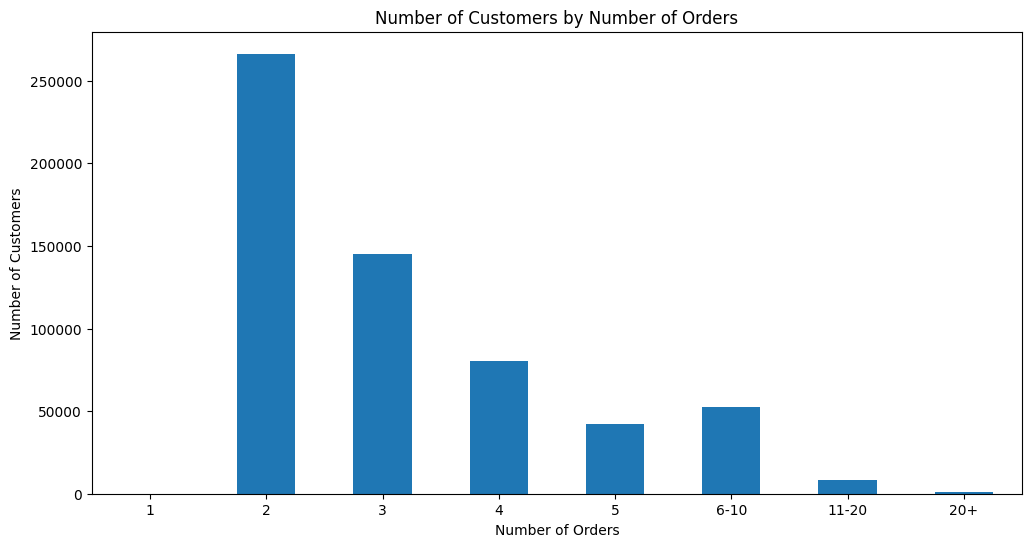

In [65]:
# Create bins for the order counts
bins = [0, 1, 2, 3, 4, 5, 10, 20, float('inf')]
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '20+']
df_customer_orders['order_bins'] = pd.cut(df_customer_orders['order_count'], bins=bins, labels=labels, right=False)

# Group by the bins and count the number of customers in each bin
order_bins_counts = df_customer_orders['order_bins'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
order_bins_counts.plot(kind='bar')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Number of Orders')
plt.xticks(rotation=0)
plt.show()

In [66]:

merged_df_for_trips=merged_df.sort_values(['trip_id','service_time_end'])
merged_df_for_trips['stop_nr']=float('nan')
display(merged_df_for_trips.head(30))




,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id_x,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_y,distinct_box_id_count,article_count,total_weight,experience,stop_nr
19625,2024-11-01 08:38:16+01:00,2024-11-01 08:43:57+01:00,5.683333,2024-11-01 08:30:00+01:00,80,6442,1,522059,15,2024-11-01 08:30:00+01:00,False,2.0,True,False,522059,0,3,39790,605,NaN
19626,2024-11-01 09:24:42+01:00,2024-11-01 09:25:53+01:00,1.183333,2024-11-01 08:30:00+01:00,87,6442,1,215044,15,2024-11-01 08:30:00+01:00,False,0.0,True,True,215044,0,11,144390,605,NaN
19628,2024-11-01 09:39:53+01:00,2024-11-01 09:44:07+01:00,4.233333,2024-11-01 08:45:00+01:00,268,6442,1,413115,15,2024-11-01 08:45:00+01:00,False,0.0,True,False,413115,2,12,49134,605,NaN
19638,2024-11-01 09:59:06+01:00,2024-11-01 10:12:50+01:00,13.733333,2024-11-01 08:45:00+01:00,6604,6442,1,60321,15,2024-11-01 08:45:00+01:00,False,3.0,True,False,60321,0,7,112400,605,NaN
19630,2024-11-01 10:16:04+01:00,2024-11-01 10:26:13+01:00,10.150000,2024-11-01 09:45:00+01:00,899,6442,1,278977,15,2024-11-01 09:45:00+01:00,True,3.0,True,False,278977,0,6,90600,605,NaN
19627,2024-11-01 10:37:47+01:00,2024-11-01 10:51:41+01:00,13.900000,2024-11-01 09:30:00+01:00,257,6442,1,287580,15,2024-11-01 09:30:00+01:00,False,2.0,True,True,287580,0,7,95750,605,NaN
19629,2024-11-01 10:56:33+01:00,2024-11-01 11:11:42+01:00,15.150000,2024-11-01 09:30:00+01:00,579,6442,1,325450,15,2024-11-01 09:30:00+01:00,True,2.0,True,False,325450,0,6,103000,605,NaN
14802,2024-11-01 09:09:32+01:00,2024-11-01 09:17:28+01:00,7.933333,2024-11-01 08:30:00+01:00,228,3680,2,43847,27,2024-11-01 08:30:00+01:00,True,1.0,True,False,43847,1,5,69500,216,NaN
14800,2024-11-01 09:21:52+01:00,2024-11-01 09:30:32+01:00,8.666666,2024-11-01 08:30:00+01:00,57,3680,2,386483,27,2024-11-01 08:30:00+01:00,False,4.0,True,False,386483,0,2,39900,216,NaN
14803,2024-11-01 09:33:23+01:00,2024-11-01 09:41:36+01:00,8.216666,2024-11-01 09:00:00+01:00,953,3680,2,354850,27,2024-11-01 09:00:00+01:00,True,1.0,True,True,354850,0,5,81950,216,NaN


In [67]:
trip_id=1
stop_nr=1

# iterate through merged_df
for index, row in merged_df_for_trips.iterrows():
    # if the trip_id is the same as the previous row, increment stop_nr
    if row['trip_id']==trip_id:
        merged_df_for_trips.loc[index,'stop_nr']=stop_nr
        stop_nr+=1
    # if the trip_id is different, reset stop_nr
    else:
        stop_nr=1
    # update the stop_nr column
        merged_df_for_trips.loc[index,'stop_nr']=stop_nr
    # update the trip_id
    trip_id=row['trip_id']
display(merged_df_for_trips.head(30))

,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id_x,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_y,distinct_box_id_count,article_count,total_weight,experience,stop_nr
19625,2024-11-01 08:38:16+01:00,2024-11-01 08:43:57+01:00,5.683333,2024-11-01 08:30:00+01:00,80,6442,1,522059,15,2024-11-01 08:30:00+01:00,False,2.0,True,False,522059,0,3,39790,605,1.0
19626,2024-11-01 09:24:42+01:00,2024-11-01 09:25:53+01:00,1.183333,2024-11-01 08:30:00+01:00,87,6442,1,215044,15,2024-11-01 08:30:00+01:00,False,0.0,True,True,215044,0,11,144390,605,2.0
19628,2024-11-01 09:39:53+01:00,2024-11-01 09:44:07+01:00,4.233333,2024-11-01 08:45:00+01:00,268,6442,1,413115,15,2024-11-01 08:45:00+01:00,False,0.0,True,False,413115,2,12,49134,605,3.0
19638,2024-11-01 09:59:06+01:00,2024-11-01 10:12:50+01:00,13.733333,2024-11-01 08:45:00+01:00,6604,6442,1,60321,15,2024-11-01 08:45:00+01:00,False,3.0,True,False,60321,0,7,112400,605,4.0
19630,2024-11-01 10:16:04+01:00,2024-11-01 10:26:13+01:00,10.150000,2024-11-01 09:45:00+01:00,899,6442,1,278977,15,2024-11-01 09:45:00+01:00,True,3.0,True,False,278977,0,6,90600,605,5.0
19627,2024-11-01 10:37:47+01:00,2024-11-01 10:51:41+01:00,13.900000,2024-11-01 09:30:00+01:00,257,6442,1,287580,15,2024-11-01 09:30:00+01:00,False,2.0,True,True,287580,0,7,95750,605,6.0
19629,2024-11-01 10:56:33+01:00,2024-11-01 11:11:42+01:00,15.150000,2024-11-01 09:30:00+01:00,579,6442,1,325450,15,2024-11-01 09:30:00+01:00,True,2.0,True,False,325450,0,6,103000,605,7.0
14802,2024-11-01 09:09:32+01:00,2024-11-01 09:17:28+01:00,7.933333,2024-11-01 08:30:00+01:00,228,3680,2,43847,27,2024-11-01 08:30:00+01:00,True,1.0,True,False,43847,1,5,69500,216,1.0
14800,2024-11-01 09:21:52+01:00,2024-11-01 09:30:32+01:00,8.666666,2024-11-01 08:30:00+01:00,57,3680,2,386483,27,2024-11-01 08:30:00+01:00,False,4.0,True,False,386483,0,2,39900,216,1.0
14803,2024-11-01 09:33:23+01:00,2024-11-01 09:41:36+01:00,8.216666,2024-11-01 09:00:00+01:00,953,3680,2,354850,27,2024-11-01 09:00:00+01:00,True,1.0,True,True,354850,0,5,81950,216,2.0


In [68]:
correlation_stop_nr_service_time = merged_df_for_trips['stop_nr'].corr(merged_df_for_trips['service_time_in_minutes'])
print(f"Correlation between stop_nr and service time: {correlation_stop_nr_service_time}")

Correlation between stop_nr and service time: -0.06718479321743609


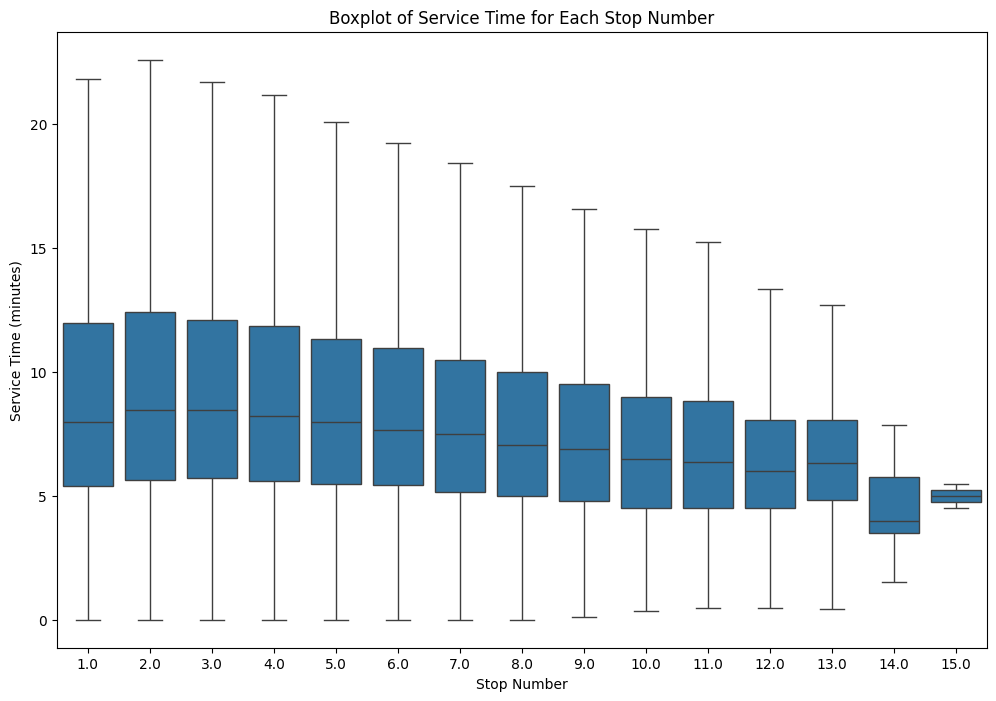

In [69]:
# import sns
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.boxplot(x='stop_nr', y='service_time_in_minutes', data=merged_df_for_trips,showfliers=False)
plt.xlabel('Stop Number')
plt.ylabel('Service Time (minutes)')
plt.title('Boxplot of Service Time for Each Stop Number')
plt.show()

In [70]:
# Group by stop_nr and calculate the average service time for each stop number
average_service_time_per_stop = merged_df_for_trips.groupby('stop_nr')['service_time_in_minutes'].median().reset_index()
# Add the number of orders for each stop number
average_service_time_per_stop['order_count'] = merged_df_for_trips.groupby('stop_nr')['web_order_id'].count().values
# Rename the columns for better understanding
average_service_time_per_stop.columns = ['stop_nr', 'average_service_time', 'order_count']

# Display the result
display(average_service_time_per_stop)




,stop_nr,average_service_time,order_count
0,1.0,8.000000,491732
1,2.0,8.483333,227445
2,3.0,8.450000,202187
3,4.0,8.216666,167294
4,5.0,8.000000,128023
5,6.0,7.666666,89069
6,7.0,7.491667,55164
7,8.0,7.066666,29431
8,9.0,6.900000,13197
9,10.0,6.500000,4836


In [71]:
# save the df_ for later use
merged_df_for_trips.to_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\merged_df.parquet")

In [72]:
# Create a new column 'station_nr' initialized with NaN
merged_df['station_nr'] = float('nan')

# Iterate through each unique trip_id
for trip_id in unique_trip_ids_df['trip_id']:
    # Filter the rows with the current trip_id
    trip_df = merged_df[merged_df['trip_id'] == trip_id]
    
    # Order the rows by 'service_time_start'
    trip_df = trip_df.sort_values('service_time_start')
    
    # Add the ordering number as 'station_nr'
    merged_df.loc[trip_df.index, 'station_nr'] = range(1, len(trip_df) + 1)

# Display the updated DataFrame
display(merged_df)

KeyboardInterrupt: 

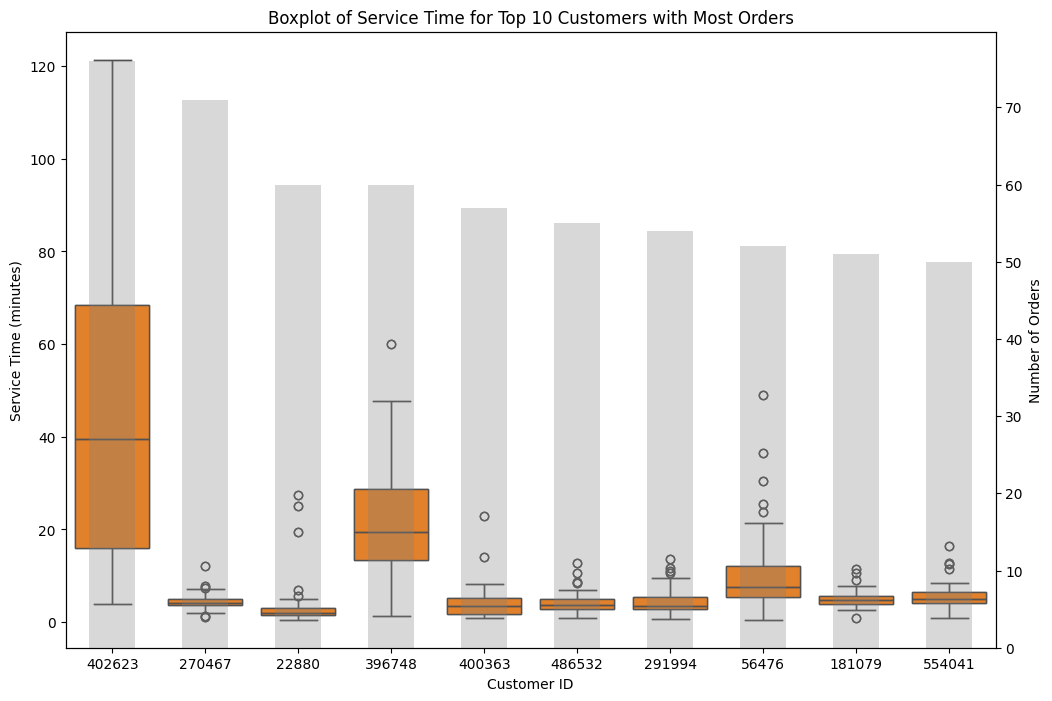

In [73]:
# import sns
import seaborn as sns

# Filter the dataframe for customer 402623

customer_402623_df = merged_df[merged_df['customer_id_y'] == 402623]
# Get the top 10 customers with the most orders
top_10_customers = df_customer_orders.nlargest(10, 'order_count')['customer_id_y']

# Filter the dataframe for the top 10 customers
top_10_customers_df = merged_df[merged_df['customer_id_y'].isin(top_10_customers)]

# Create a boxplot of the service time for the top 10 customers
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_id_y', y='service_time_in_minutes', data=top_10_customers_df)
plt.xlabel('Customer ID')
plt.ylabel('Service Time (minutes)')
plt.title('Boxplot of Service Time for Top 10 Customers with Most Orders')
# Create a secondary y-axis to plot the amount of orders
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot the boxplot
sns.boxplot(x='customer_id_y', y='service_time_in_minutes', data=top_10_customers_df, ax=ax1)
ax1.set_xlabel('Customer ID')
ax1.set_ylabel('Service Time (minutes)')
ax1.set_title('Boxplot of Service Time for Top 10 Customers with Most Orders')

# Plot the amount of orders
order_counts = df_customer_orders.set_index('customer_id_y').loc[top_10_customers].order_count
order_counts.plot(kind='bar', ax=ax2, alpha=0.3, color='gray')
ax2.set_ylabel('Number of Orders')

plt.show()

In [74]:
# drop collums

merged_df = merged_df.drop(columns=['service_time_start','order_time', 'service_time_end', 'order_datetime', 'driver_id', 'trip_id','customer_id_x'])
merged_df

,service_time_in_minutes,web_order_id,warehouse_id,has_elevator,floor,is_pre_order,is_business,customer_id_y,distinct_box_id_count,article_count,total_weight,experience,station_nr
0,8.950000,1,27,True,7.0,True,False,35422,2,17,20443,764,6.0
1,9.900000,1182,27,False,3.0,True,False,38233,0,6,102000,764,5.0
2,7.866666,3062,27,False,2.0,True,False,285690,0,6,120130,764,6.0
3,18.416666,3194,27,False,1.0,True,True,433850,0,9,135770,764,1.0
4,9.416666,3622,27,False,0.0,True,False,194578,0,11,189950,764,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410224,14.333333,1534609,42,False,0.0,False,False,268872,3,17,40747,9,NaN
1410225,24.550000,1534614,42,True,4.0,False,True,421949,0,6,121800,9,NaN
1410226,16.600000,1534618,42,True,1.0,False,False,573548,0,6,91408,9,NaN
1410227,16.916666,1534621,42,False,2.0,False,False,35569,2,12,40588,9,NaN


In [75]:
correlation = merged_df['experience'].corr(merged_df['service_time_in_minutes'])
print(f"Correlation between experience and service time: {correlation}")

Correlation between experience and service time: -0.11126486190881836


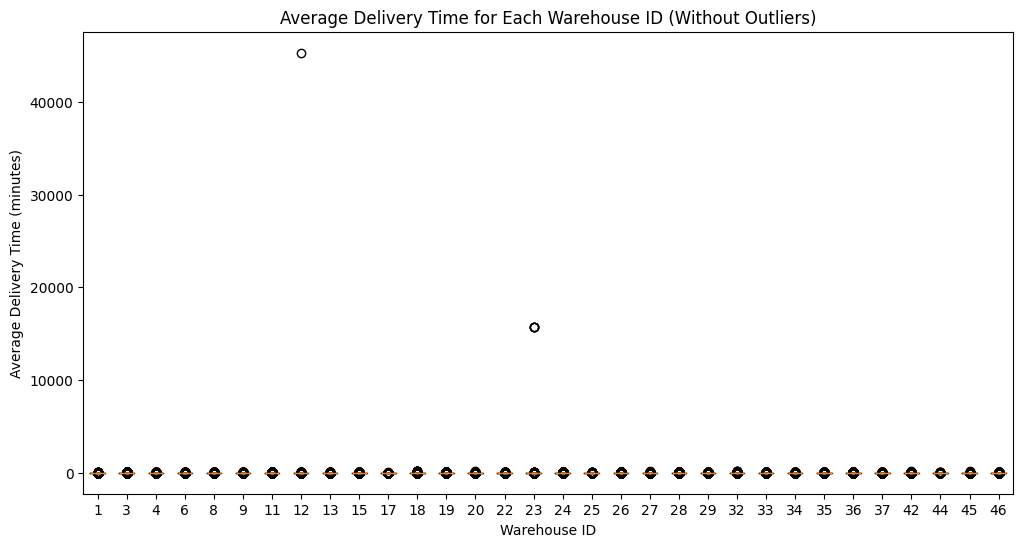

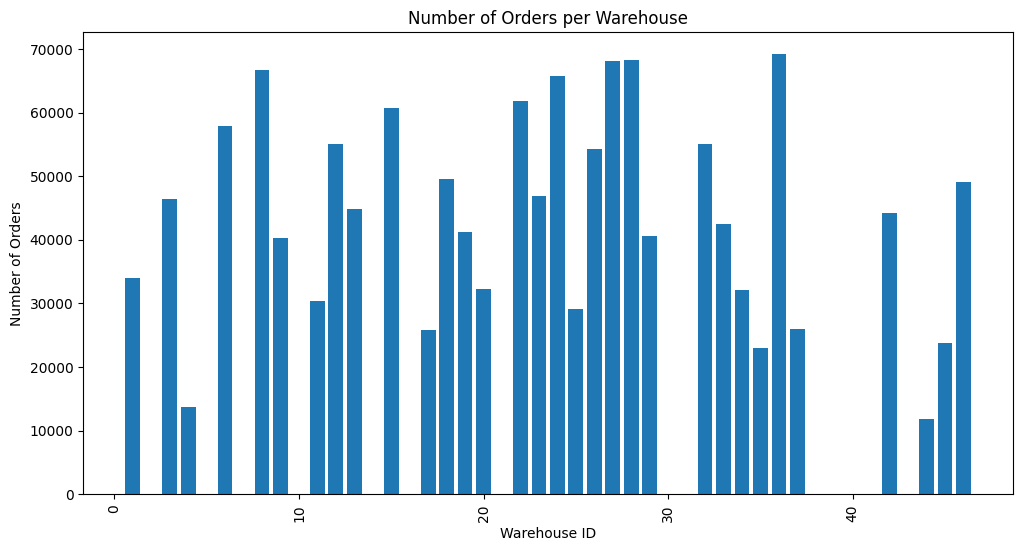

In [77]:
# Calculate the average delivery time for each warehouse
average_delivery_time = merged_df.groupby('warehouse_id')['floor'].mean().reset_index()
# Plot the results without showing the outliers
plt.figure(figsize=(12, 6))
plt.boxplot([merged_df[merged_df['warehouse_id'] == warehouse]['floor'] for warehouse in average_delivery_time['warehouse_id']], labels=average_delivery_time['warehouse_id'], showfliers=True)
plt.xlabel('Warehouse ID')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Average Delivery Time for Each Warehouse ID (Without Outliers)')

# Create a second plot for the amount of orders per Warehouse
plt.figure(figsize=(12, 6))
order_counts = merged_df['warehouse_id'].value_counts().sort_index()
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('Warehouse ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Warehouse')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# import K NN regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [ ]:
X = merged_df.drop(columns=['service_time_in_minutes', 'customer_id_y'])  # Features
y = merged_df['service_time_in_minutes']  # Target

In [ ]:
categorical_features = [ 'has_elevator', 'is_pre_order', 'is_business']
numerical_features = ['floor', 'distinct_box_id_count', 'article_count', 'total_weight', 'experience']

In [ ]:
# Create a ColumnTransformer to preprocess the data

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Normalize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,warehouse_id,has_elevator,floor,is_pre_order,is_business,distinct_box_id_count,article_count,total_weight,Orders_Grouped
110173,46,False,4.0,True,False,0,8,122548,200-1000
42929,28,True,4.0,False,False,0,7,120050,10-50
238724,24,False,2.0,True,False,0,6,89856,200-1000
588889,36,True,5.0,True,False,1,5,44640,200-1000
949218,11,True,2.0,True,False,0,5,86250,50-200
...,...,...,...,...,...,...,...,...,...
110268,46,True,3.0,False,False,0,2,27510,200-1000
259178,12,False,1.0,False,False,2,18,54520,200-1000
131932,36,True,2.0,False,True,2,5,42450,200-1000
671155,33,False,3.0,False,False,1,9,31474,50-200


In [ ]:
# 4. Transform the Data
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

X_train_transformed
# Convert the sparse matrix to a dense array and create a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
# add a collum with the warehouse ID
X_train_transformed_df['warehouse_id']=X_train['warehouse_id']
X_train_transformed_df
# 

,num__floor,num__distinct_box_id_count,num__article_count,num__total_weight,cat__has_elevator_False,cat__has_elevator_True,cat__is_pre_order_False,cat__is_pre_order_True,cat__is_business_False,cat__is_business_True,cat__Orders_Grouped_10-50,cat__Orders_Grouped_1000+,cat__Orders_Grouped_200-1000,cat__Orders_Grouped_50-200,cat__Orders_Grouped_<10,warehouse_id
0,0.045775,-0.632335,-0.225998,0.749794,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
1,0.045775,-0.632335,-0.329633,0.706902,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0
2,0.005665,-0.632335,-0.433268,0.188455,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
3,0.065830,0.212650,-0.536902,-0.587927,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
4,0.005665,-0.632335,-0.536902,0.126538,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128178,0.025720,-0.632335,-0.847806,-0.882059,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
1128179,-0.014390,1.057635,0.810348,-0.418283,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
1128180,0.005665,1.057635,-0.536902,-0.625531,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1128181,0.025720,0.212650,-0.122364,-0.813995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0


In [ ]:
# Transform the test data (using the same preprocessor fitted on the training data)
X_test_transformed = preprocessor.transform(X_test)

# Convert the sparse matrix to a dense array and create a DataFrame
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed_df
# add a collum with the warehouse ID
X_test_transformed_df['warehouse_id']=X_test['warehouse_id']
X_test_transformed_df

,num__floor,num__distinct_box_id_count,num__article_count,num__total_weight,cat__has_elevator_False,cat__has_elevator_True,cat__is_pre_order_False,cat__is_pre_order_True,cat__is_business_False,cat__is_business_True,cat__Orders_Grouped_10-50,cat__Orders_Grouped_1000+,cat__Orders_Grouped_200-1000,cat__Orders_Grouped_50-200,cat__Orders_Grouped_<10,warehouse_id
0,0.025720,-0.632335,-0.847806,-0.669316,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1,0.005665,1.057635,0.188540,-0.233957,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2,-0.014390,-0.632335,-0.536902,0.400408,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,0.005665,-0.632335,-0.536902,-0.003271,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,0.005665,0.212650,-0.640537,-0.783328,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282041,-0.034445,-0.632335,-0.640537,-0.337925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
282042,0.025720,-0.632335,-0.847806,-0.693354,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
282043,-0.034445,-0.632335,-0.018729,1.082267,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
282044,-0.014390,-0.632335,-0.536902,0.218452,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [ ]:
# Create a dictionary to store KNN models for each warehouse
knn_models = {}

# Iterate through each unique warehouse_id
for warehouse in X_train['warehouse_id'].unique():
    # Filter the training data for the current warehouse
    X_train_warehouse = X_train[X_train['warehouse_id'] == warehouse]
    y_train_warehouse = y_train[X_train['warehouse_id'] == warehouse]
    

    # Transform the data using the preprocessor
    X_train_warehouse_transformed = preprocessor.transform(X_train_warehouse)

    # Initialize and train the KNN model
    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    knn_regressor.fit(X_train_warehouse_transformed, y_train_warehouse)
    
    # Store the trained model in the dictionary
    knn_models[warehouse] = knn_regressor

# Display the dictionary of trained models
knn_models

{46: KNeighborsRegressor(),
 28: KNeighborsRegressor(),
 24: KNeighborsRegressor(),
 36: KNeighborsRegressor(),
 11: KNeighborsRegressor(),
 15: KNeighborsRegressor(),
 18: KNeighborsRegressor(),
 13: KNeighborsRegressor(),
 19: KNeighborsRegressor(),
 6: KNeighborsRegressor(),
 35: KNeighborsRegressor(),
 23: KNeighborsRegressor(),
 42: KNeighborsRegressor(),
 1: KNeighborsRegressor(),
 4: KNeighborsRegressor(),
 3: KNeighborsRegressor(),
 33: KNeighborsRegressor(),
 34: KNeighborsRegressor(),
 12: KNeighborsRegressor(),
 45: KNeighborsRegressor(),
 32: KNeighborsRegressor(),
 9: KNeighborsRegressor(),
 22: KNeighborsRegressor(),
 27: KNeighborsRegressor(),
 8: KNeighborsRegressor(),
 20: KNeighborsRegressor(),
 37: KNeighborsRegressor(),
 26: KNeighborsRegressor(),
 29: KNeighborsRegressor(),
 25: KNeighborsRegressor(),
 17: KNeighborsRegressor(),
 44: KNeighborsRegressor()}

In [ ]:
len(knn_models)

32

In [ ]:
# Initialize dictionaries to store predictions and scores for each warehouse
warehouse_predictions = {}
warehouse_scores = {}
y_labels=[]
y_pred = []
# Iterate through each unique warehouse_id in the test set
for warehouse in X_test['warehouse_id'].unique():
    # Filter the test data for the current warehouse
    X_test_warehouse = X_test[X_test['warehouse_id'] == warehouse]
    y_test_warehouse = y_test[X_test['warehouse_id'] == warehouse]
    
    # Transform the data using the preprocessor
    X_test_warehouse_transformed = preprocessor.transform(X_test_warehouse)
    
    # Get the corresponding KNN model for the current warehouse
    knn_regressor = knn_models[warehouse]
    
    # Make predictions
    y_pred_warehouse = knn_regressor.predict(X_test_warehouse_transformed)
    
    # Store the predictions
    warehouse_predictions[warehouse] = y_pred_warehouse
    for i in range(len(y_test_warehouse)):
        y_labels.append(y_test_warehouse.iloc[i])
        y_pred.append(y_pred_warehouse[i])
    # Calculate the score for the current warehouse
    mse_warehouse = mean_squared_error(y_test_warehouse, y_pred_warehouse)
    r2_warehouse = r2_score(y_test_warehouse, y_pred_warehouse)
    
    # Store the scores
    warehouse_scores[warehouse] = {'MSE': mse_warehouse, 'R2': r2_warehouse}

# Calculate the overall score
overall_mse = mean_squared_error(y_labels, y_pred)
overall_r2 = r2_score(y_labels, y_pred)

# Print the overall score
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall R² Score: {overall_r2}")

# Print the scores for each warehouse
for warehouse, scores in warehouse_scores.items():
    print(f"Warehouse {warehouse} - Mean Squared Error (MSE): {scores['MSE']}, R² Score: {scores['R2']}")

Overall Mean Squared Error (MSE): 29.52091568847929
Overall R² Score: 0.24080223571942105
Warehouse 8 - Mean Squared Error (MSE): 25.473128610289898, R² Score: 0.20963467717240536
Warehouse 19 - Mean Squared Error (MSE): 39.13055217645926, R² Score: 0.25506634246246396
Warehouse 3 - Mean Squared Error (MSE): 30.685219207282504, R² Score: 0.24424817247372999
Warehouse 22 - Mean Squared Error (MSE): 32.28994104998068, R² Score: 0.16272758266826748
Warehouse 12 - Mean Squared Error (MSE): 26.960793691343664, R² Score: 0.24447792164071025
Warehouse 18 - Mean Squared Error (MSE): 23.607923017024127, R² Score: 0.1652665921220956
Warehouse 36 - Mean Squared Error (MSE): 31.17317282423461, R² Score: 0.24427473107212105
Warehouse 33 - Mean Squared Error (MSE): 35.15932549304231, R² Score: 0.16543963147059926
Warehouse 17 - Mean Squared Error (MSE): 25.740284344065216, R² Score: 0.24386082800071207
Warehouse 26 - Mean Squared Error (MSE): 41.7519229815065, R² Score: 0.192553276128698
Warehouse 1

In [ ]:
# calculate the mae score
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_labels, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

NameError: name 'y_labels' is not defined

In [ ]:
# # 5. Train the KNN Regressor
# knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Initialize KNN Regressor
# knn_regressor.fit(X_train_transformed, y_train)  # Fit the model on the transformed training data



KNeighborsRegressor()

In [ ]:

# 6. Make Predictions
y_pred = knn_regressor.predict(X_test_transformed)

In [ ]:
# 7. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 30.452206135729348
R² Score: 0.23676456778172594


Mean Squared Error (MSE): 30.452206135729348
R² Score: 0.23676456778172594